Plan de ataque
-----------------------------
1. EDA
    0. Numerical summaries of variables
    1. Normality of width, weight, sat
    2. Conditional density plots para y con width, weight
    3. Correlation between width and weight (por lo que se ve en las figuras anteriores)
    4. Mirar si hay relacion entre las otras variables tambien (for two categorical: Chi-Square; For one categorical and one numerical, one-way ANOVA test)
2. Modelos
    1. Usamos la variable sat, e ignoro la variable y. Vemos cómo relacionarla con weight/width: La variable sat es una variable Quantitative Discrete. Therefore, Linear Regression cannot be used. Poisson regression should be used instead:
         1. Assumptions: Poisson regression assumes that the data follows a Poisson distribution, and that mean = variance. If this is not the case, an alternative to Poisson regression is Negative binomial regression.
         2. Check the effects of multicollinearity: Do the F-tests depend on the order? Are they counter-intutitive? In that case, remove one of the two variables. I can decide which one to remove based on Variance Inflation Factor (VIF>=5 caution; VIF>=10 definite indication of multicollinearity).
    2. Para relacionar sat con las variables color and spine, puedo usar Spearman Rank (porque las variables son Ordinal, y sat es Quantitative Discrete).
    
3. Compare models (using ANOVA and/or Adj. R^2; TODO: search how to combine all these different models...)

# 1 EDA: Numerical Summary

In [1]:
library(car)
library(ggplot2)

# Read data
crab.df = read.delim('data.txt', header = TRUE, sep = "\t", dec = ".")

# Create factor
crab.df$y <- as.factor(crab.df$y)
crab.df$color <- as.factor(crab.df$color)
crab.df$spine <- as.factor(crab.df$spine)

# 1.A Numerical summaries of variables
summary(crab.df)

Loading required package: carData


      sat         y           weight          width      color  spine  
 Min.   : 0.000   0: 62   Min.   :1.200   Min.   :21.0   1:12   1: 37  
 1st Qu.: 0.000   1:111   1st Qu.:2.000   1st Qu.:24.9   2:95   2: 15  
 Median : 2.000           Median :2.350   Median :26.1   3:44   3:121  
 Mean   : 2.919           Mean   :2.437   Mean   :26.3   4:22          
 3rd Qu.: 5.000           3rd Qu.:2.850   3rd Qu.:27.7                 
 Max.   :15.000           Max.   :5.200   Max.   :33.5                 

# 2 EDA: Histogram of `sat`

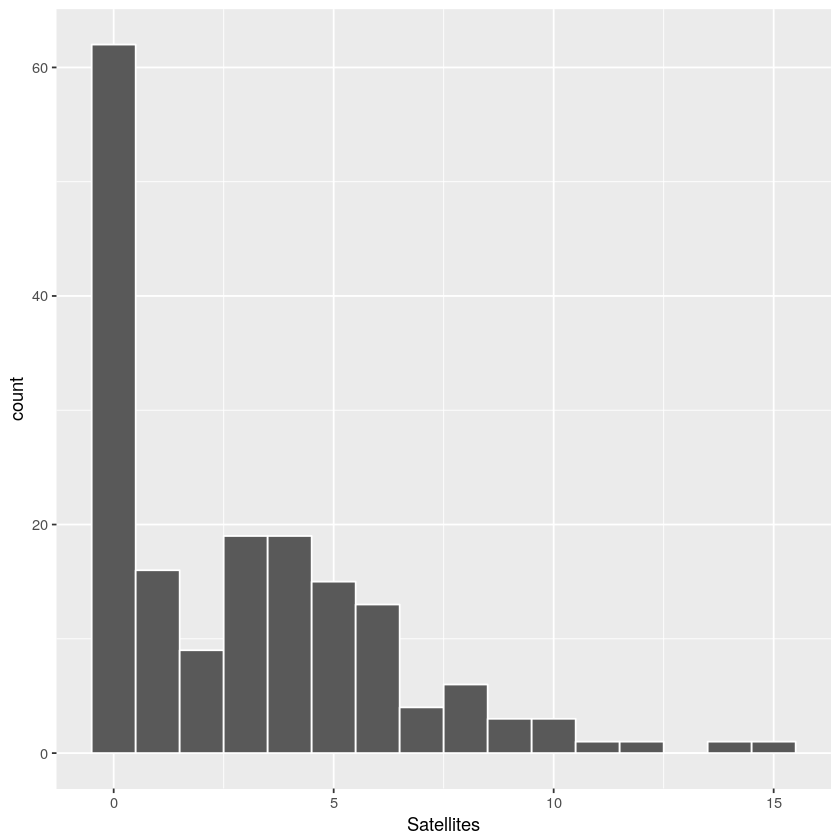

In [2]:
# 1.B Normality of sat (Distribution of `sat` variable)
# Explicar que podemos decir que sigue una Poisson...?
#hist(crab.df$sat, main="", xlab="Satellites", breaks=20) # Histogram for number of satellites
qplot(crab.df$sat, geom="histogram", xlab="Satellites", bins=16, color=I("white")) 

# 3.0 Normality plots for width and weight

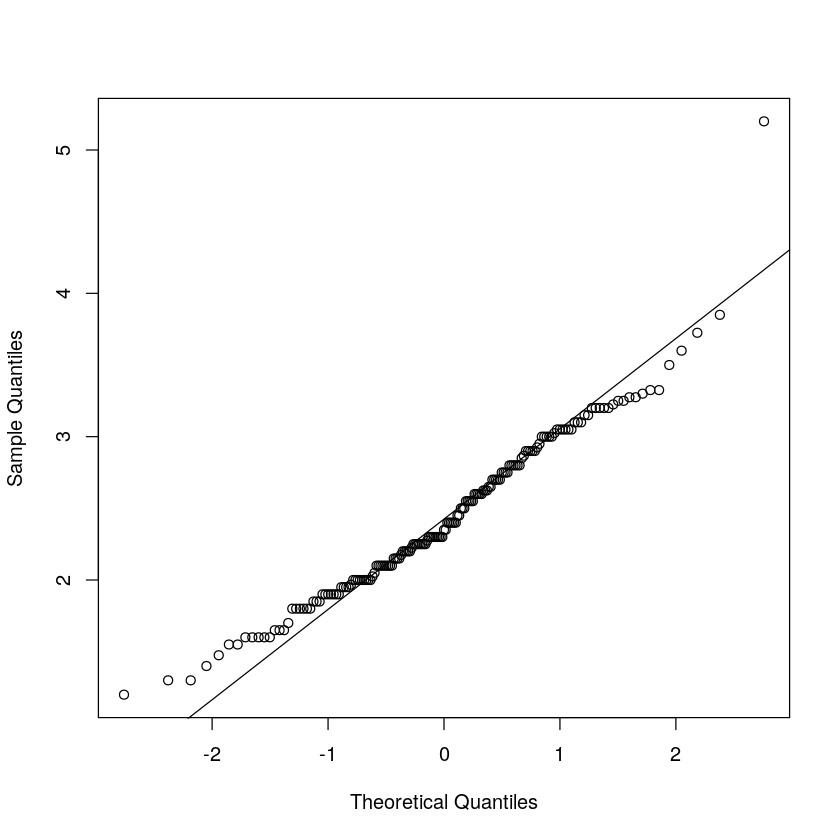

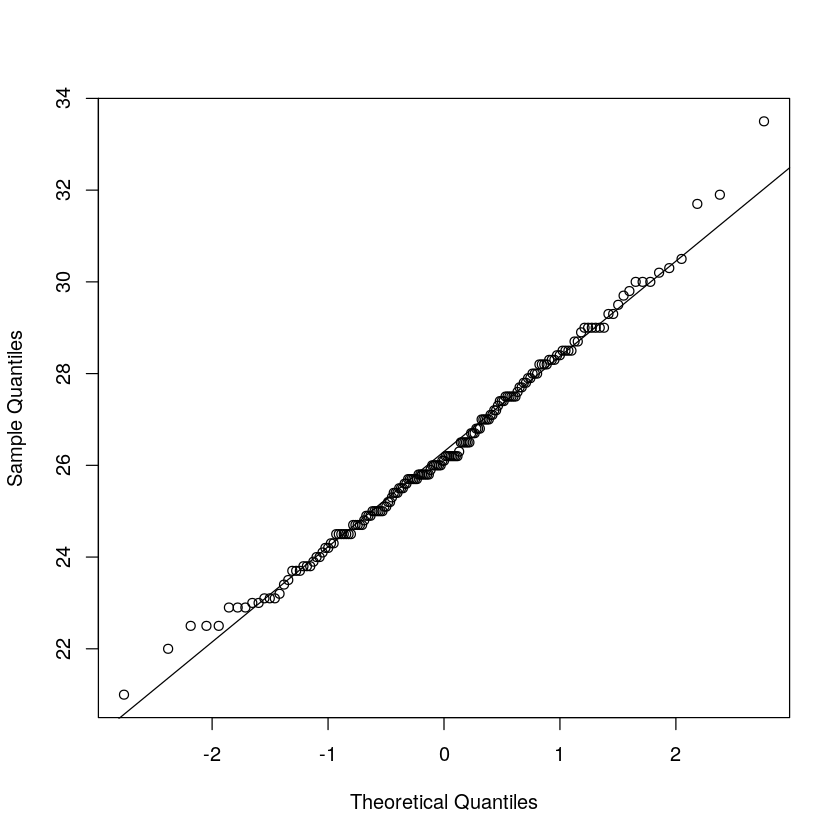

In [3]:
# hist(crab.df$weight)
# hist(crab.df$width)

# 1.B Normality of width, weight

qqnorm(crab.df$weight, main="") # Normal Q-Q Plot for Weight
qqline(crab.df$weight)

qqnorm(crab.df$width, main="") # Normal Q-Q Plot for Width
qqline(crab.df$width)

# 3.1 Pearson correlation coefficient

In [4]:
cor(crab.df$weight, crab.df$width, method="pearson")

[1] 0.8868715

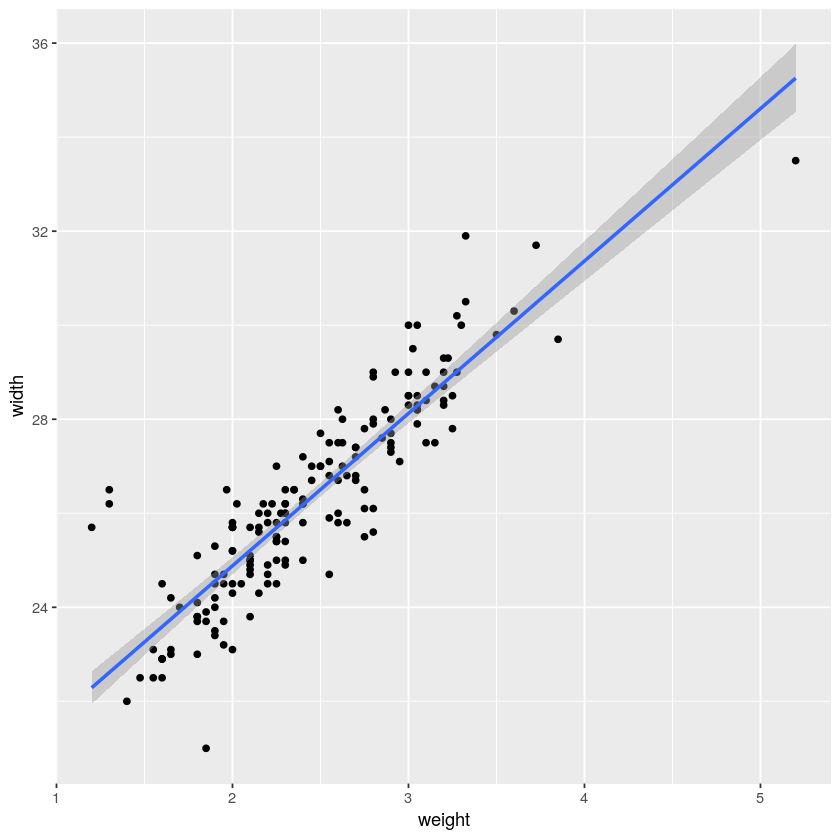

In [5]:
#theme_set(theme_bw())
ggplot(crab.df, aes(x=weight, y=width)) + geom_point() + 
geom_smooth(method=lm)

--------------------

#### Conditional density plots of y

This variable is not normally distributed. 





--------------------

# 3.2 Linear model for weight and width (maybe it's better not to include this...)

(Intercept)      weight 
  18.398526    3.241567


Call:
lm(formula = width ~ weight, data = crab.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3954 -0.5817 -0.0370  0.4942  3.8874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.3985     0.3234   56.89   <2e-16 ***
weight        3.2416     0.1291   25.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9773 on 171 degrees of freedom
Multiple R-squared:  0.7865,	Adjusted R-squared:  0.7853 
F-statistic: 630.1 on 1 and 171 DF,  p-value: < 2.2e-16


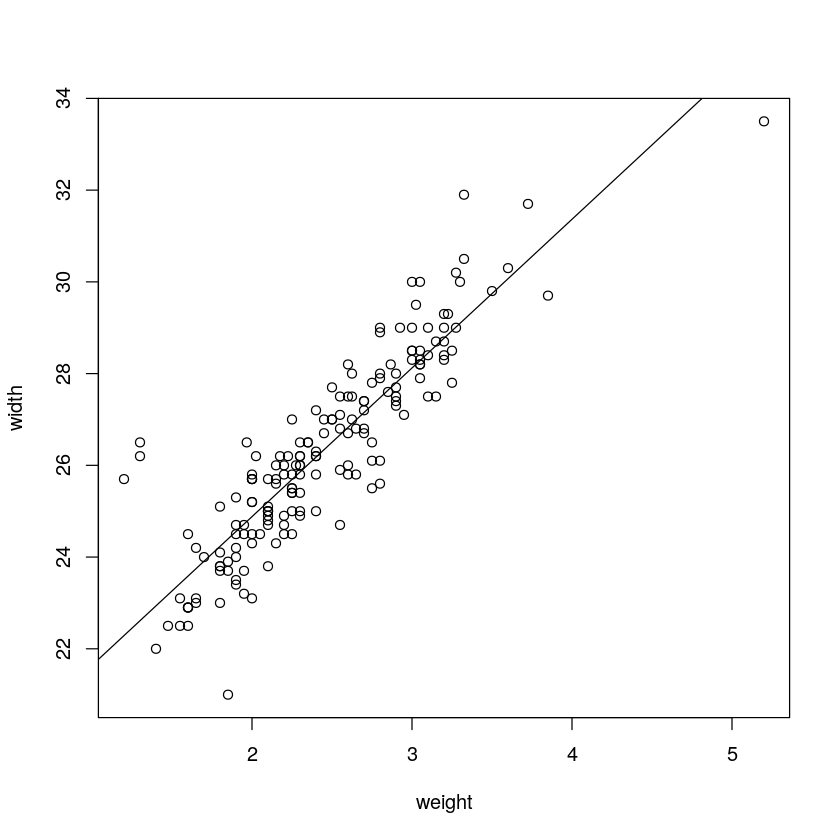

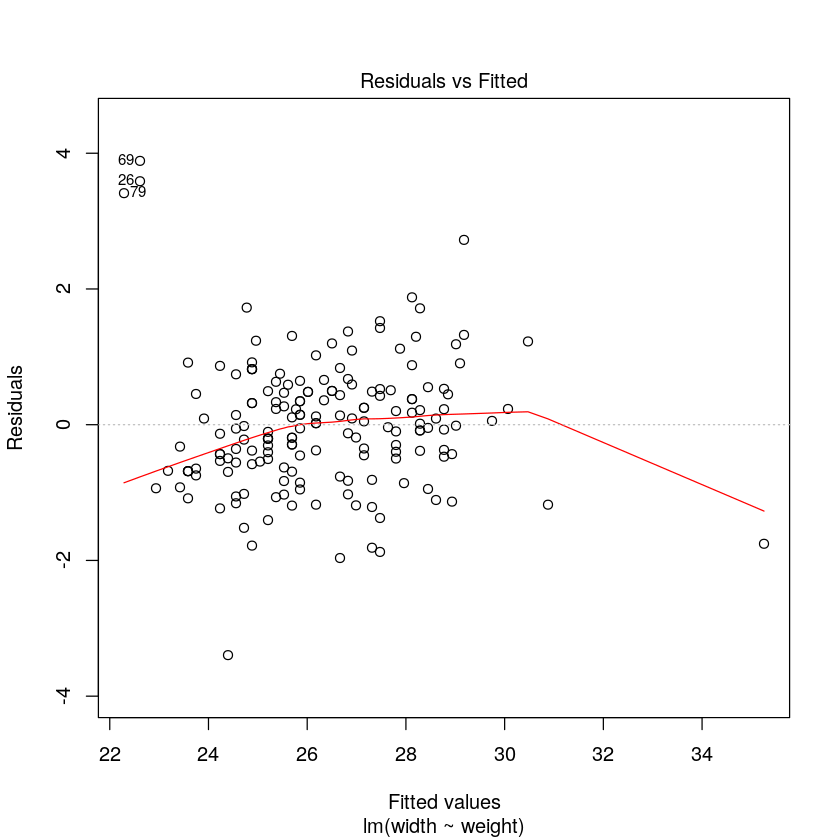

In [6]:
# 1.D Correlation between width and weight (por lo que se ve en las figuras anteriores)
# Fit model
hmod <- lm(width ~ weight, data=crab.df) 
coef(hmod)
summary(hmod)
# Visualize errors
#layout(matrix(1:2,ncol=2)) 
plot(width ~ weight, data=crab.df) 
abline(hmod) 
plot(hmod, which = 1)

In [7]:
# 1.D Correlation between width and weight (por lo que se ve en las figuras anteriores)
summary(hmod)


Call:
lm(formula = width ~ weight, data = crab.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3954 -0.5817 -0.0370  0.4942  3.8874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.3985     0.3234   56.89   <2e-16 ***
weight        3.2416     0.1291   25.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9773 on 171 degrees of freedom
Multiple R-squared:  0.7865,	Adjusted R-squared:  0.7853 
F-statistic: 630.1 on 1 and 171 DF,  p-value: < 2.2e-16


# Relation between weight and color (tp hace falta?)

# Relation between weight and spine (creo que tp hace falta...)

# Relation between color and spine (no sé si hace falta)

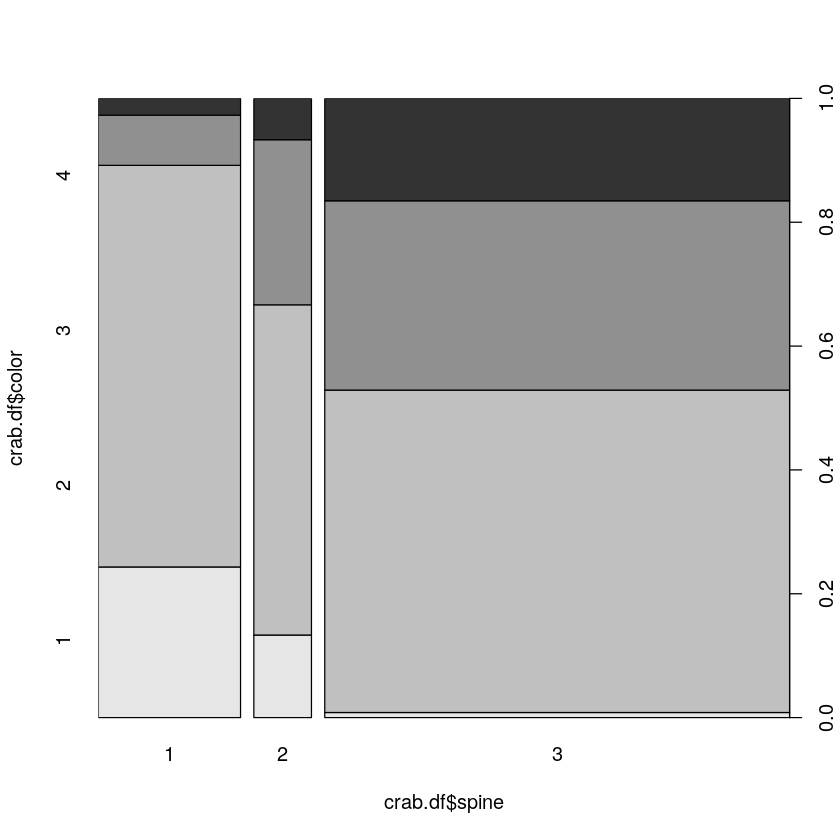

In [8]:
# 1.E Relation between color and spine
spineplot(crab.df$color ~ crab.df$spine, col=gray.colors(4, 0.9, 0.2))

# 2 Models with factors

#### Poisson regression

In [9]:
# 2.A.a.1
model4p = glm(sat ~ weight + color + spine, family=poisson(link=log), data=crab.df)
summary(model4p)


Call:
glm(formula = sat ~ weight + color + spine, family = poisson(link = log), 
    data = crab.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0433  -1.8609  -0.5944   0.9193   4.9483  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.04263    0.25354  -0.168   0.8665    
weight       0.54756    0.07318   7.482 7.31e-14 ***
color2      -0.26768    0.16781  -1.595   0.1107    
color3      -0.52087    0.19414  -2.683   0.0073 ** 
color4      -0.53966    0.22525  -2.396   0.0166 *  
spine2      -0.16066    0.21146  -0.760   0.4474    
spine3       0.09086    0.11948   0.760   0.4470    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 632.79  on 172  degrees of freedom
Residual deviance: 549.70  on 166  degrees of freedom
AIC: 919

Number of Fisher Scoring iterations: 6


#### Quasi-Poisson

In [10]:
# 2.A.a.1
model4qp = glm(sat ~ weight + color + spine, family=quasipoisson(link=log), data=crab.df)
summary(model4qp)


Call:
glm(formula = sat ~ weight + color + spine, family = quasipoisson(link = log), 
    data = crab.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0433  -1.8609  -0.5944   0.9193   4.9483  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04263    0.45452  -0.094    0.925    
weight       0.54756    0.13119   4.174 4.83e-05 ***
color2      -0.26768    0.30083  -0.890    0.375    
color3      -0.52087    0.34803  -1.497    0.136    
color4      -0.53966    0.40380  -1.336    0.183    
spine2      -0.16066    0.37909  -0.424    0.672    
spine3       0.09086    0.21419   0.424    0.672    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 3.213748)

    Null deviance: 632.79  on 172  degrees of freedom
Residual deviance: 549.70  on 166  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


#### Negative binomial regression

In [11]:
# 2.A.a.2
library(MASS)
model4b = glm.nb(sat ~ weight + color + spine, data=crab.df)
summary(model4b)


Call:
glm.nb(formula = sat ~ weight + color + spine, data = crab.df, 
    init.theta = 0.9650308392, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8782  -1.3684  -0.3245   0.4242   2.2309  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.32230    0.56387  -0.572    0.568    
weight       0.69294    0.16565   4.183 2.88e-05 ***
color2      -0.32061    0.37253  -0.861    0.389    
color3      -0.59550    0.41590  -1.432    0.152    
color4      -0.57850    0.46433  -1.246    0.213    
spine2      -0.24107    0.39339  -0.613    0.540    
spine3       0.04246    0.24792   0.171    0.864    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.965) family taken to be 1)

    Null deviance: 220.67  on 172  degrees of freedom
Residual deviance: 196.52  on 166  degrees of freedom
AIC: 761.32

Number of Fisher Scoring iterations: 1


              Theta:  0.965 


#### Zero-augmented poisson

#### Negative binomial regression, using factors, VIF

In [12]:
AIC(glm.nb(sat ~ weight + color + spine, data=crab.df))

AIC(glm.nb(sat ~ width + color + spine, data=crab.df))

AIC(step(glm.nb(sat ~ weight + color + spine, data=crab.df), trace=0))

AIC(step(glm.nb(sat ~ width + color + spine, data=crab.df), trace=0))

[1] 761.3209

[1] 764.3398

[1] 754.6437

[1] 757.291

In [13]:
lms.2 <- step(glm.nb(sat ~ weight + color + spine, data=crab.df), trace=0)

In [17]:
summary(lms.2)


Call:
glm.nb(formula = sat ~ weight, data = crab.df, init.theta = 0.9310592352, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8394  -1.4122  -0.3247   0.4744   2.1279  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8647     0.4048  -2.136   0.0327 *  
weight        0.7603     0.1578   4.817 1.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.9311) family taken to be 1)

    Null deviance: 216.43  on 172  degrees of freedom
Residual deviance: 196.16  on 171  degrees of freedom
AIC: 754.64

Number of Fisher Scoring iterations: 1


              Theta:  0.931 
          Std. Err.:  0.168 

 2 x log-likelihood:  -748.644 

In [16]:
196.16/171

[1] 1.147135

$\theta = 0.93$, $\beta_0=-0.86$, $\beta_1=0.76$ with $\theta$ the dispersion parameter for Negative Binomial

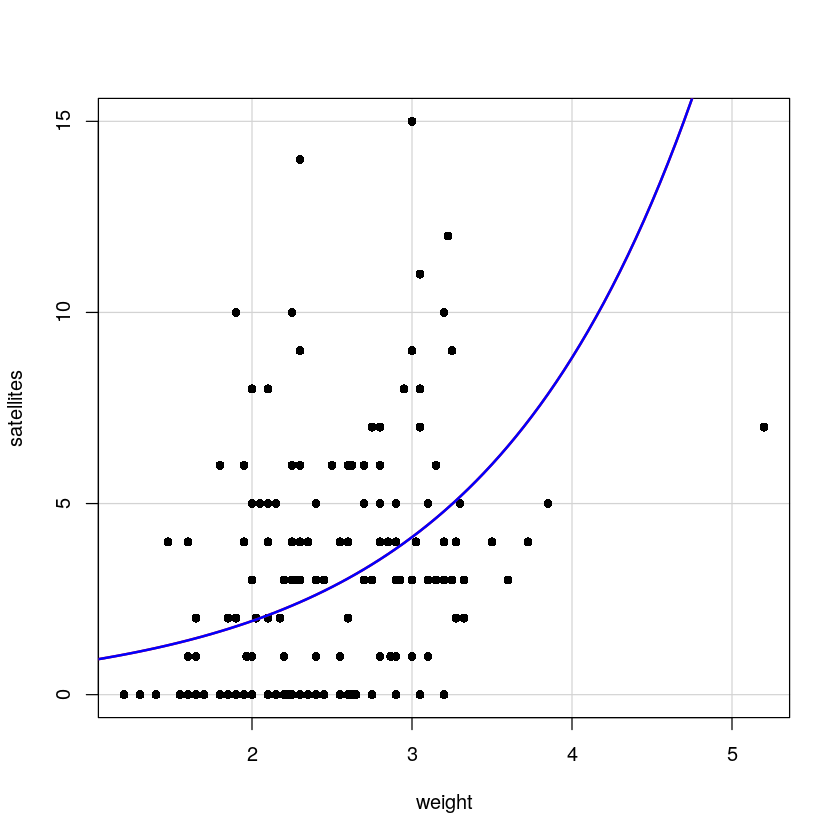

In [21]:
timeaxis <- seq (0, 6, 0.05)

Y <- predict(lms.2, list(weight = timeaxis))

b = function(x){-0.8647+0.7603*x}

plot(crab.df$weight, crab.df$sat, xlab = "weight", ylab = "satellites", pch = 16, panel.first=grid(lty=1))
lines(timeaxis, exp(Y), lwd = 2, col = "red")
lines(timeaxis, exp(b(timeaxis)), lwd=2, col="blue")

# grid(nx = NULL, ny = NULL, col = "lightgray", lty = 1,
#      lwd = par("lwd"), equilogs = TRUE)

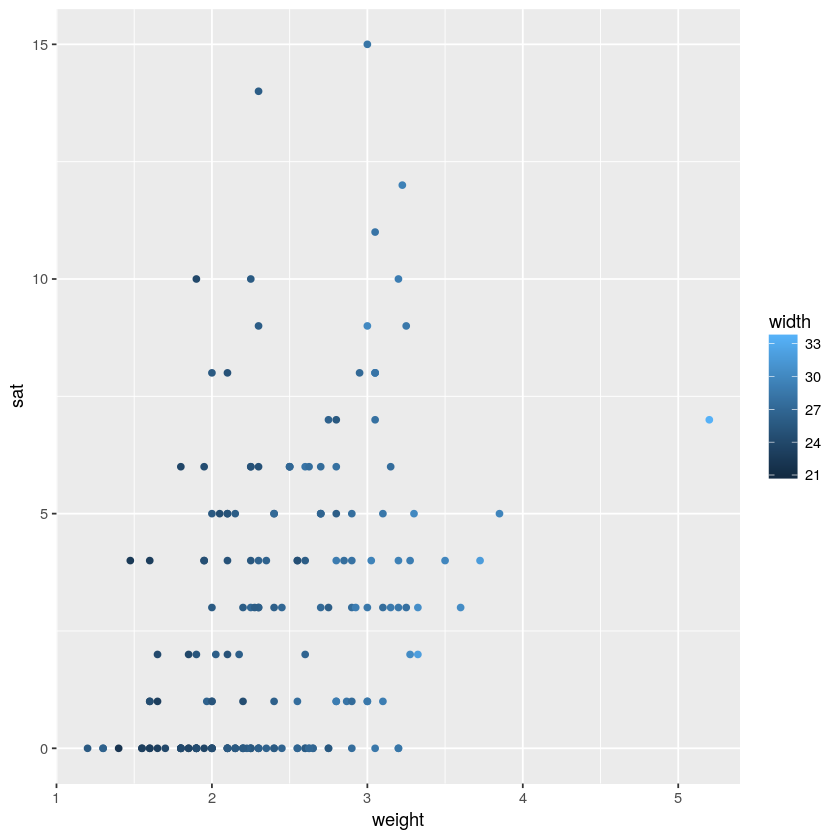

In [31]:
ggplot(crab.df, aes(x=weight, y=sat)) + geom_point(aes(colour = width))

#### Zero-augmented poisson, using factors, VIF

#### Zero-augmented poisson, using factors, VIF

#### I can double check by comparing both models using ANOVA